In [2]:
# importing libraries 
import pandas as pd
import numpy as np 
from  matplotlib import pyplot  as plt 

In [17]:
#reading  data with pandas  
data=pd.read_csv("Salaries.csv")    
data

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN


# 1.Basic Data Exploration

In [18]:

N_rows,N_cols=data.shape

print("Number of rows is :",N_rows)
print("Number of cols is :",N_cols)

Number of rows is : 148654
Number of cols is : 13


In [19]:
#types of  data columns 
columns_names=data.columns
types=data.dtypes.replace("object","str")
print(types)

Id                    int64
EmployeeName            str
JobTitle                str
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency                  str
Status              float64
dtype: object


In [20]:
# check NUll values in columns 
null_values = data.isnull().sum()
print(null_values)

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2.Descriptive Statistics

In [21]:

df_mean=data["TotalPay"].mean()# mean of salaries
df_median = data["TotalPay"].median()# median of salaries
df_mode  = data["TotalPay"].mode()# mode of salaries

df_std=data["TotalPay"].std()# standard deviation of salaries

df_max=data["TotalPay"].max()# maximum salary 
df_min=data["TotalPay"].min()# minimum salary


print("Mean of data =",df_mean,sep=" ")
print("Mean of data =",df_median,sep=" ")
print("Mean of data =",df_mode,sep=" ")

print("standard deviation of data =",df_std,sep=" ")

print("Max value of data =",df_max,sep=" ")
print("Mini value  of data =",df_min,sep=" ")

print(f"Range of salaries is from {df_min} to {df_max}")

Mean of data = 74768.32197169267
Mean of data = 71426.60999999999
Mean of data = 0    0.0
Name: TotalPay, dtype: float64
standard deviation of data = 50517.005273949944
Max value of data = 567595.43
Mini value  of data = -618.13
Range of salaries is from -618.13 to 567595.43


# 3.Data Cleaning

In [22]:
# Replace null values in Benefits column Becasue Benefits will add to salary and some rows has a value 
data["Benefits"].fillna(value=0, inplace=True)
data["BasePay"].fillna(value=0, inplace=True)
data["OvertimePay"].fillna(value=0, inplace=True)
data["OtherPay"].fillna(value=0, inplace=True)

# Remove Notes and Status columns because they are empty
data.drop(['Notes', 'Status'], axis=1, inplace=True)

#removing all rows that contain negative value  
data=data[data["TotalPay"]>0]

In [23]:
# clear empty rows 
data_filtered=data[data["EmployeeName"]!="Not provided"]

# Reindex the DataFrame
df_filtered = data_filtered.reset_index(drop=True)

In [24]:
# check change in shape
N_rows,N_cols=data_filtered.shape

print("Number of rows is :",N_rows)
print("Number of cols is :",N_cols)

# check None values 
null_values = data_filtered.isnull().sum()
print(null_values)

Number of rows is : 148285
Number of cols is : 11
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# 4.Basic Data Visualization

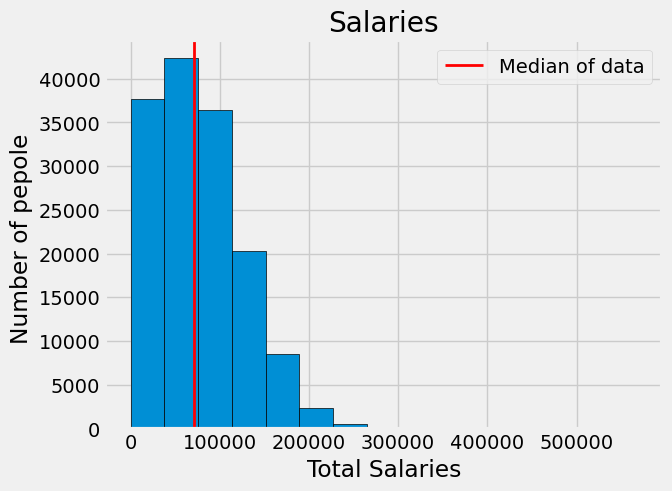

In [25]:
plt.style.use("fivethirtyeight")
plt.hist(data_filtered["TotalPay"],bins=15,edgecolor="black")
plt.title("Salaries")
plt.xlabel("Total Salaries")
plt.ylabel("Number of pepole ")
plt.axvline(df_median,color="r",linewidth=2,label="Median of data")
plt.legend()
plt.grid(True)
plt.show()

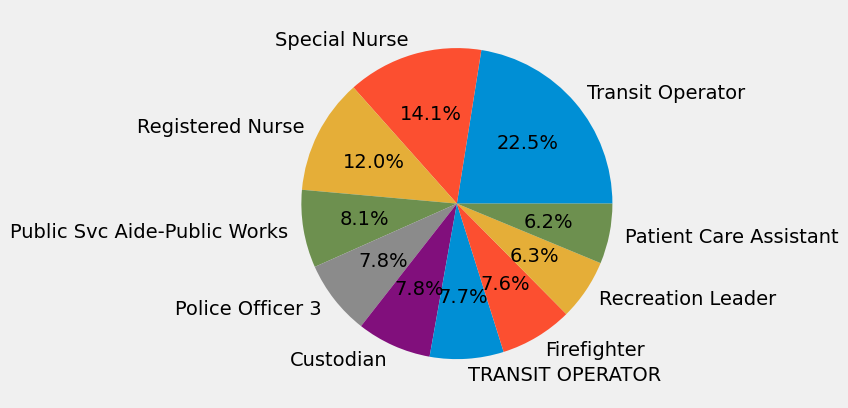

In [26]:
from collections import Counter

counter1 = Counter(data_filtered['JobTitle'])

# print(counter1)

sorted_dict = dict(sorted(counter1.items(), key=lambda item: item[1], reverse=True))

values=list(sorted_dict.values())
index=list(sorted_dict.keys())
plt.pie(values[:10],labels=index[:10],autopct="%1.1f%%") 

plt.show()


# 5.Grouped Analysis

In [27]:
# Group by 'Agency' and 'JobTitle' calculate average salary for each group

grouped_data1 = data.groupby(['JobTitle', 'Agency'])['TotalPay'].mean()


# Display the summary statistics

print(grouped_data1)

JobTitle                                        Agency       
ACCOUNT CLERK                                   San Francisco    44035.664337
ACCOUNTANT                                      San Francisco    47429.268000
ACCOUNTANT INTERN                               San Francisco    29031.742917
ACPO,JuvP, Juv Prob (SFERS)                     San Francisco    62290.780000
ACUPUNCTURIST                                   San Francisco    67594.400000
                                                                     ...     
X-RAY LABORATORY AIDE                           San Francisco    52705.880385
X-Ray Laboratory Aide                           San Francisco    50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  San Francisco    53632.870000
Youth Comm Advisor                              San Francisco    41414.307500
ZOO CURATOR                                     San Francisco    66686.560000
Name: TotalPay, Length: 2155, dtype: float64


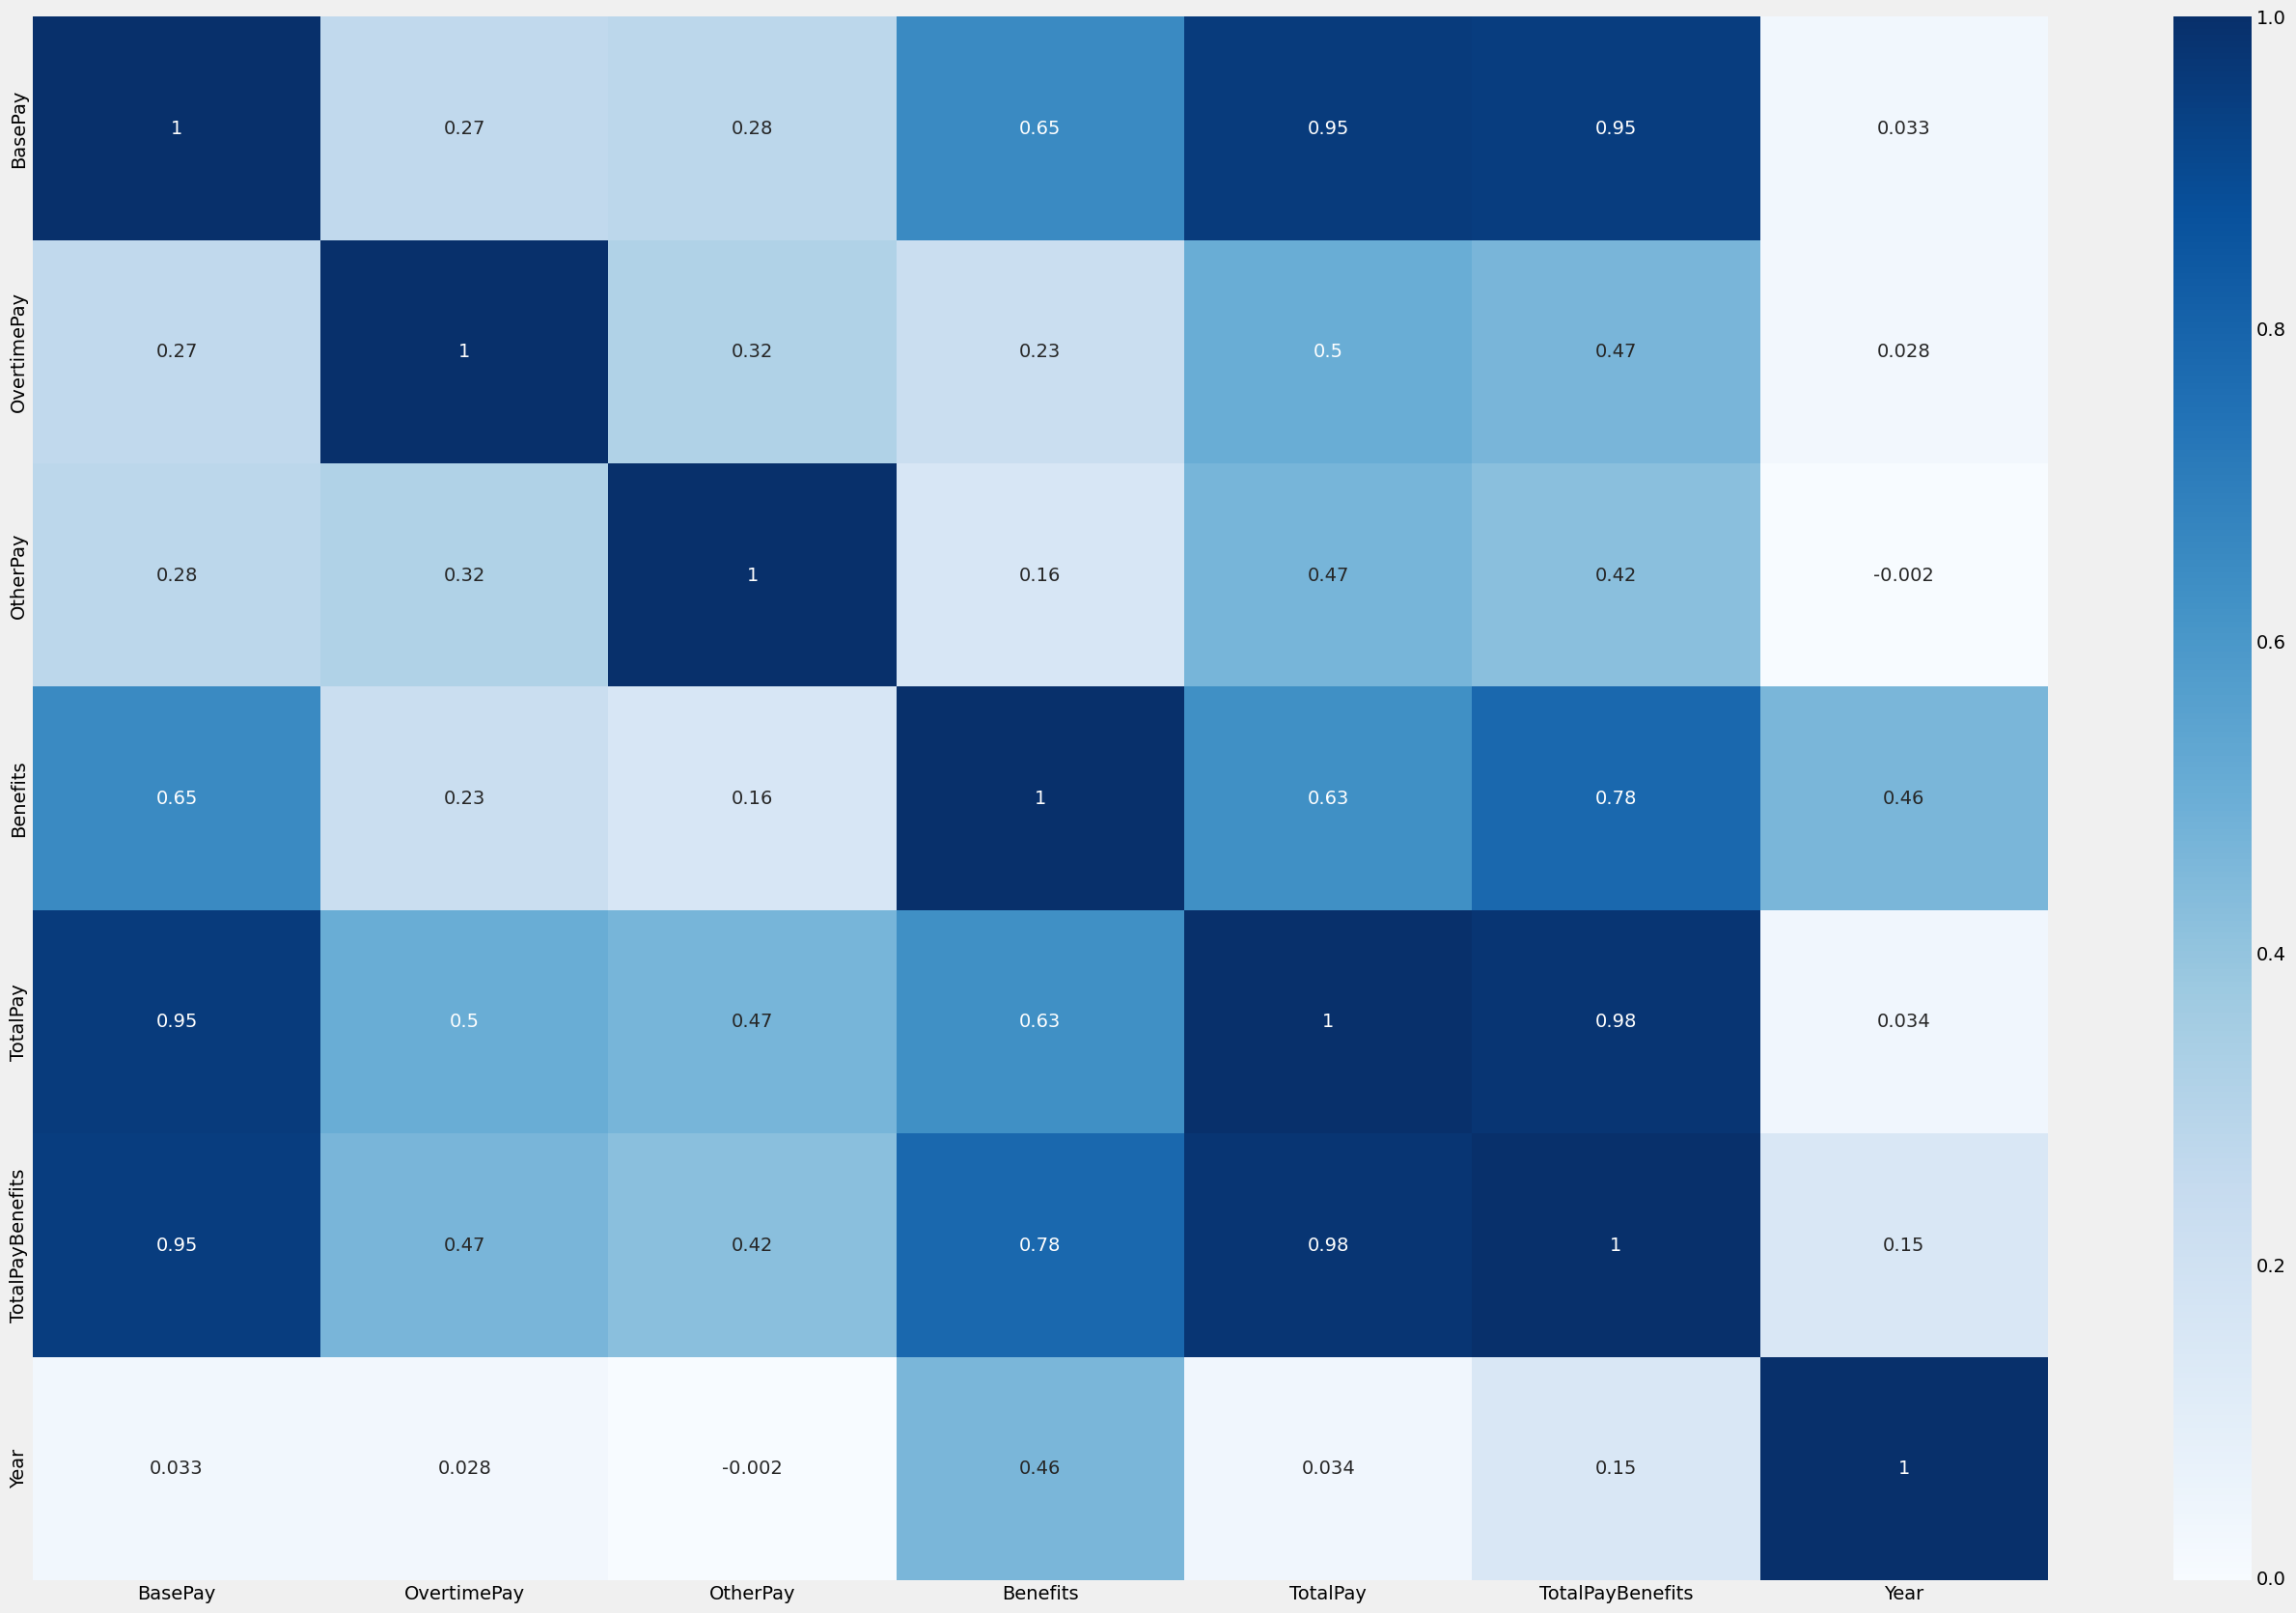

In [30]:

import seaborn as sns
sub_data=data.loc[:,["BasePay","OvertimePay","OtherPay","Benefits","TotalPay","TotalPayBenefits","Year"]]
plt.figure(figsize=(30, 20))

sns.heatmap(sub_data.corr(), annot=True, cmap="Blues")
plt.show()


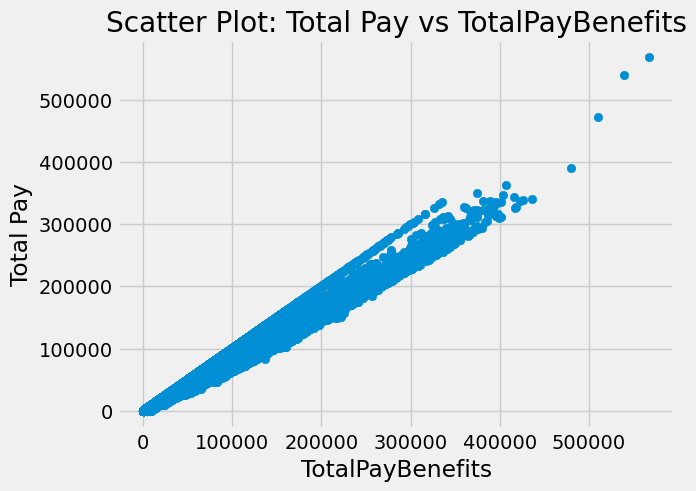

In [29]:

correlation = data['TotalPay'].corr(data['TotalPayBenefits'])

# Plotting the scatter plot
plt.scatter(data['TotalPayBenefits'], data['TotalPay'])
plt.title('Scatter Plot: Total Pay vs TotalPayBenefits')
plt.xlabel('TotalPayBenefits')
plt.ylabel('Total Pay')
plt.show()